# Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución

In [3]:
# Importacion de librerias
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [4]:
#Lectura de dataset "diabetes_dataset.csv"
df = pd.read_csv("diabetes_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Se hace la division de las columnas para poder obtener los datos necesarios para hacer el entrenamiento y las pruebas
x = df.drop(["Outcome"], axis=1)
y = df.Outcome

## Entrenamiento

In [6]:
#Aplicando la separacion de los datos para el test y el train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
#Parametros con Entropy y Max_depth 4
myTree1 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#Se entrena el Decision Tree Classifier
myTree1.fit(x_train,y_train)
#Aqui se predice la respuesta para el subset de datos de prueba (test)
y_pred1 = myTree1.predict(x_test)

In [8]:
#Parametros con Gini y Max_depth 5
myTree2 = DecisionTreeClassifier(criterion="gini", max_depth = 5)
#Se entrena el Decision Tree Classifier
myTree2.fit(x_train,y_train)
#Aqui se predice la respuesta para el subset de datos de prueba (test)
y_pred2 = myTree2.predict(x_test)

In [9]:
#Parametros con Gini y Max_depth 5
myTree3 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
#Se entrena el Decision Tree Classifier
myTree3.fit(x_train,y_train)
#Aqui se predice la respuesta para el subset de datos de prueba (test)
y_pred3 = myTree3.predict(x_test)

## Creacion visual de los arboles

In [10]:
#Aqui se puede visualizar el arbol creado pero en forma de texto
print(tree.export_text(myTree1))

|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 30.95
|   |   |   |--- feature_6 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.67
|   |   |   |   |--- class: 0
|   |   |--- feature_5 >  30.95
|   |   |   |--- feature_2 <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  37.00
|   |   |   |   |--- class: 0
|   |--- feature_7 >  28.50
|   |   |--- feature_5 <= 26.35
|   |   |   |--- feature_5 <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  9.65
|   |   |   |   |--- class: 0
|   |   |--- feature_5 >  26.35
|   |   |   |--- feature_1 <= 94.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  94.50
|   |   |   |   |--- class: 1
|--- feature_1 >  127.50
|   |--- feature_5 <= 29.95
|   |   |--- feature_1 <= 145.50
|   |   |   |--- feature_0 <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  2.50
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  145.50
|   |   |   |--- f

[Text(0.5, 0.9, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.7, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.5, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.3, 'x[6] <= 0.672\nentropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.03125, 0.1, 'entropy = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.09375, 0.1, 'entropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(0.1875, 0.3, 'x[2] <= 37.0\nentropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.15625, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.21875, 0.1, 'entropy = 0.603\nsamples = 95\nvalue = [81, 14]'),
 Text(0.375, 0.5, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.3, 'x[5] <= 9.65\nentropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.28125, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.34375, 0.1, 'entropy = 0.0\nsamples = 33\nv

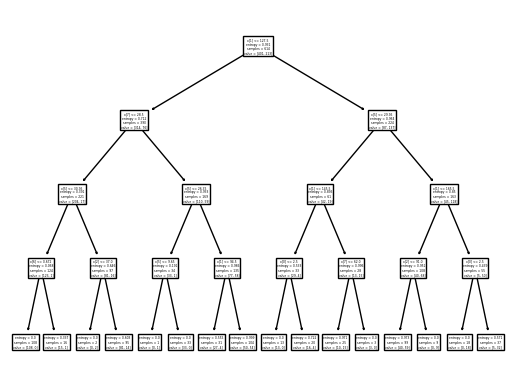

In [11]:
#Aqui se puede visualizar el arbol creado pero en forma de grafico
tree.plot_tree(myTree1)

## Resultados

In [12]:
myTree1.score(x_test, y_test)

0.7142857142857143

In [13]:
myTree2.score(x_test, y_test)

0.7922077922077922

In [14]:
myTree3.score(x_test, y_test)

0.7857142857142857